<a href="https://colab.research.google.com/github/source-droid/Machine-Learning-based-Automatic-Covid-19-detection-using-Lung-s-Scans/blob/main/Only_My_Own_Model_Trained_on_Covid_Normal_Pneumonia_without_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.utils import to_categorical

import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

## Clone Dataset

In [ ]:
# Cloning Dataset on Colab
! git clone https://github.com/source-droid/Covid-19-CXR-Dataset.git

fatal: destination path 'Covid-19-CXR-Dataset' already exists and is not an empty directory.


In [2]:
size = 150 

# Reading the Training images


In [3]:
#Reading Training Images For Covid and Normal


import numpy as np 
import glob 
import cv2 
path_l = glob.glob("/content/Covid-19-CXR-Dataset/train/Covid/*.*")
cv_img = [] 
for img in path_l:
    
    n = cv2.imread(img) 
   # n  = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # BGR to Grayscale Conversion
    n = cv2.resize(n,(size,size)) 
    cv_img.append(n) 
arrayl = np.asarray(cv_img) 
print(arrayl.shape) 

path_2 = glob.glob("/content/Covid-19-CXR-Dataset/train/Normal/*.*")
cv_img = []
for img in path_2:
    n = cv2.imread(img)
    #n  = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # BGR to Grayscale Conversion
    n = cv2.resize(n,(size,size))
    cv_img.append(n) 
array2 = np.asarray(cv_img) 
print(array2.shape) 

path_3 = glob.glob("/content/Covid-19-CXR-Dataset/train/Viral Pneumonia/*.*")
cv_img = []
for img in path_3:
    n = cv2.imread(img)
    #n  = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # BGR to Grayscale Conversion
    n = cv2.resize(n,(size,size))
    cv_img.append(n) 
array3 = np.asarray(cv_img) 
print(array3.shape) 

(1330, 150, 150, 3)
(1072, 150, 150, 3)
(1076, 150, 150, 3)


# Reading the Testing images


In [4]:
# Reading Testing Images For Covid and Normal
import numpy as np 
import glob
import cv2 

path_l = glob.glob("/content/Covid-19-CXR-Dataset/test/Covid/*.*") 
cv_img = [] 
for img in path_l:
    n = cv2.imread(img) 
    #n  = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # BGR to Grayscale Conversion
    n = cv2.resize(n,(size,size))
    cv_img.append(n)
array4 = np.asarray(cv_img) 
print(array4.shape) 

path_2 = glob.glob("/content/Covid-19-CXR-Dataset/test/Normal/*.*") 
cv_img = []
for img in path_2:
    n = cv2.imread(img) 
    #n  = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # BGR to Grayscale Conversion
    n = cv2.resize(n,(size,size)) 
    cv_img.append(n) 
array5 = np.asarray(cv_img)
print(array5.shape) 

path_3 = glob.glob("/content/Covid-19-CXR-Dataset/test/Viral Pneumonia/*.*") 
cv_img = []
for img in path_3:
    n = cv2.imread(img) 
    #n  = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # BGR to Grayscale Conversion
    n = cv2.resize(n,(size,size)) 
    cv_img.append(n) 
array6 = np.asarray(cv_img)
print(array6.shape) 


(333, 150, 150, 3)
(269, 150, 150, 3)
(269, 150, 150, 3)


# Dataset Details

|           |Covid |Normal |Pneumonia|Total     |
|:---------:|:---: |:-----:|:-------:|:--------:|
|**Train**  |1330  |1072   |1076     |3478      |
|**Test**   | 333  | 269   |269      |871       |
|**Total**  |1663  |1341   |1345     |**4349**  |


# Concatenating Covid and Normal arrays into one variable for train and test:

In [5]:
# Concatenating Covid and Normal arrays into one variable for train and test:
Xtrain = np.concatenate((arrayl,array2,array3))

Xtest = np.concatenate((array4,array5, array6))

Xtrain.shape , Xtest.shape 

((3478, 150, 150, 3), (871, 150, 150, 3))

# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for training data:

In [6]:
# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for training data:

labels0 = np.zeros(len(arrayl)) 
labels1 = np.ones(len(array2)) 
labels2 = np.ones(len(array3)) 
for i in range(len(array3)):
  labels2[i] = 2


print('Normal labels : ',labels0 ,'Covid labels : ', labels1, 'Pneumonia : ', labels2) 
len(labels0) , len(labels1) , len(labels2)


Normal labels :  [0. 0. 0. ... 0. 0. 0.] Covid labels :  [1. 1. 1. ... 1. 1. 1.] Pneumonia :  [2. 2. 2. ... 2. 2. 2.]


(1330, 1072, 1076)

# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for testing data:

In [7]:
# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for testing data:

labels0s = np.zeros(len(array4)) 
labels1s = np.ones(len(array5)) 
labels2s = np.ones(len(array6))
for i in range(len(array6)):
  labels2s[i] = 2

print('Normal labels : ',labels0s ,'Covid labels : ', labels1s, 'Pneumonia : ', labels2s) 
len(labels0s) , len(labels1s), len(labels2s) 

Normal labels :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

(333, 269, 269)

# Concatenating the labels for Covid and Normal for training and testing:

In [8]:
# Concatenating the labels for Covid and Normal for training and testing:
ytrain = np.concatenate((labels0, labels1, labels2)) 
ytest = np.concatenate((labels0s, labels1s, labels2s)) 
ytrain.shape, ytest.shape 


((3478,), (871,))

# Splitting the dataset for validation data:

In [9]:
# Splitting the dataset for validation data:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(Xtrain,ytrain,test_size = 0.2, shuffle = True) 
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape 


((2782, 150, 150, 3), (696, 150, 150, 3), (2782,), (696,))

# Normalizing the data from 0 to 255 to 0 to 1:

In [10]:
# Normalizing the data from 0 to 255 to 0 to 1:
X_train_norm = X_train/255 
X_valid_norm = X_valid/255
Xtest_norm = Xtest/255 


In [ ]:
X_train_norm.shape,X_valid_norm.shape,Xtest_norm.shape

((2779, 256, 256), (695, 256, 256), (871, 256, 256))

## Building the Model

In [11]:
# Model With Dropout Layer


model = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model.add(Conv2D(32,(5,5), padding = 'SAME', activation = 'relu', input_shape = (size,size,3)))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
#model.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
#model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
#model.add(Dropout(0.5))
model.add(Dense(3, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

## Compile The Model

In [12]:
# compile model
from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
model.compile(Adam(lr = 0.001),loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
y_train.shape,y_valid.shape
X_train_norm.shape, X_valid_norm.shape

((2779, 480, 480), (695, 480, 480))

## Train the Model

In [13]:
# train the model
%%time
model_history = model.fit(X_train_norm,y_train,epochs = 30,validation_data=(X_valid_norm,y_valid),verbose = 1)

Epoch 1/30
87/87 [==============================] - 233s 3s/step - loss: 0.8393 - accuracy: 0.6225 - val_loss: 0.2217 - val_accuracy: 0.9310
Epoch 2/30
87/87 [==============================] - 232s 3s/step - loss: 0.2254 - accuracy: 0.9226 - val_loss: 0.2084 - val_accuracy: 0.9239
Epoch 3/30
87/87 [==============================] - 232s 3s/step - loss: 0.1511 - accuracy: 0.9507 - val_loss: 0.2351 - val_accuracy: 0.9152
Epoch 4/30
87/87 [==============================] - 232s 3s/step - loss: 0.1264 - accuracy: 0.9508 - val_loss: 0.1721 - val_accuracy: 0.9397
Epoch 5/30
87/87 [==============================] - 232s 3s/step - loss: 0.1091 - accuracy: 0.9597 - val_loss: 0.1434 - val_accuracy: 0.9483
Epoch 6/30
87/87 [==============================] - 232s 3s/step - loss: 0.0864 - accuracy: 0.9692 - val_loss: 0.1337 - val_accuracy: 0.9583
Epoch 7/30
87/87 [==============================] - 232s 3s/step - loss: 0.0563 - accuracy: 0.9781 - val_loss: 0.1402 - val_accuracy: 0.9511
Epoch 8/30
87

# Evaluating the model

In [14]:
# Evaluating the model:
model.evaluate(Xtest_norm,ytest,verbose= 1)

28/28 [==============================] - 18s 647ms/step - loss: 0.3011 - accuracy: 0.9587


[0.3010597229003906, 0.9586681723594666]

# Plot performance metrics

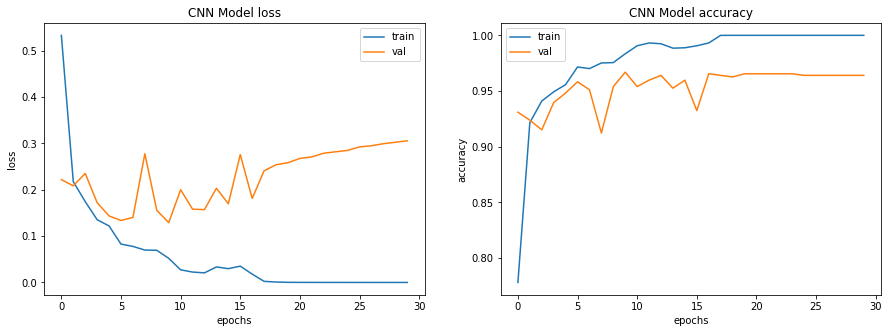

In [21]:
# plot the model accuracy and loss for the training and the validating set.
# CNN Model
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.ravel()

for i, met in enumerate(['loss', 'accuracy']):
    ax[i].plot(model_history.history[met])
    ax[i].plot(model_history.history['val_' + met])
    ax[i].set_title('CNN Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

# Confusion Matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


28/28 [==============================] - 18s 646ms/step


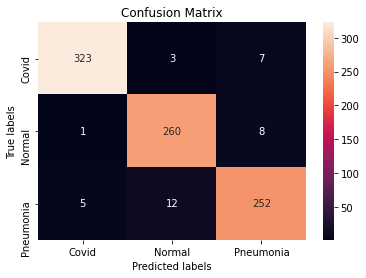

In [22]:
pred  = model.predict_classes(Xtest_norm,verbose= 1)

'''pred_normalized = []
for i in range(len(pred)):
  if(pred[i]<=0.5):
    pred_normalized.append(1)
  else:
    pred_normalized.append(0)
'''
import seaborn as sns

cm = confusion_matrix(ytest, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Covid', 'Normal','Pneumonia']);


In [ ]:
TP = 328
TN = 265
FN = 5
FP = 4
total  = TP+TN+FN+FP

print("sensitivity",TP/(TP+FN)*100)
print("Specificity",TN/(TN+FP)*100)
print("Precision",TP/(TP+FP)*100)

# When it's actually yes, how often does it predict yes
# (FP+FN)/total = (10+5)/165 = 0.09
# equivalent to 1 minus Accuracy
# also known as "Error Rate"

Misclassification_Rate = (FP+FN)/total
print("Misclassification Rate",Misclassification_Rate)
 
# How often does the yes condition actually occur in our sample?
Prevalence = (FN+TP)/total
print("Prevalence",Prevalence*100)

sensitivity 98.49849849849849
Specificity 98.51301115241635
Precision 98.79518072289156
Misclassification Rate 0.014950166112956811
Prevalence 55.3156146179402


In [25]:
ytest, pred.T



(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

## Saving The Model

In [33]:
model_save_name = 'C+N+P_Without_Dropout_Epoch30.h5'
path = F"/content/gdrive/MyDrive/Temp/{model_save_name}" 
model.save(path)

# Loading the Model

In [32]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/gdrive/MyDrive/Temp/Model trained without ImageDataGenerator.h5')

# ROC

In [ ]:
# ROC
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(Xtest_norm).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytest, y_pred_keras)

# AUC
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

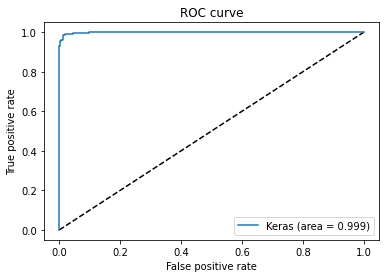

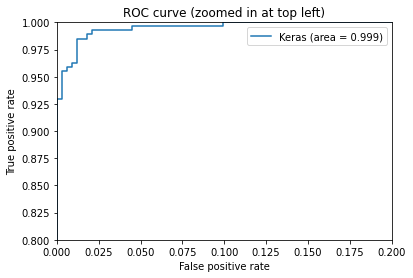

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

# precision-recall curve and f1

In [ ]:



from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

prob = model.predict_proba(Xtest_norm)

lr_precision, lr_recall, _ = precision_recall_curve(ytest, prob)
lr_f1, lr_auc = f1_score(ytest, pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(ytest[ytest==1]) / len(ytest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='CNN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import precision_score,f1_score,recall_score

# classification_report

In [27]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred))
print(' covid19 = 0, normal = 1 , Pnuemonia = 2')

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       333
         1.0       0.95      0.97      0.96       269
         2.0       0.94      0.94      0.94       269

    accuracy                           0.96       871
   macro avg       0.96      0.96      0.96       871
weighted avg       0.96      0.96      0.96       871

 covid19 = 0, normal = 1 , Pnuemonia = 2


## K-Fold cross validation


In [ ]:
# Model With Dropout Layer


def build_model():
  model = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
  model.add(Conv2D(32,(5,5), padding = 'SAME', activation = 'relu', input_shape = (150,150,3)))

  # pooling layer
  model.add(MaxPooling2D(pool_size = (2,2)))

  # place a dropout layer
  model.add(Dropout(0.5)) ## Minimizes the overfitting

  # add another convolutional layer
  model.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

  # pooling layer
  model.add(MaxPooling2D(pool_size = (2,2)))

  # place a dropout layer
  model.add(Dropout(0.5))

  # Flatten the image to 1 dimensional array
  model.add(Flatten())

  # add a dense layer : amount of nodes, activation
  model.add(Dense(256, activation = 'relu'))

  # place a dropout layer
  # 0.5 drop out rate is recommended, half input will be dropped at each update
  model.add(Dropout(0.5))
  model.add(Dense(1, activation = 'sigmoid'))

  # compile model
  from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
  model.compile(Adam(lr = 0.001),loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
%%time

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score
import time


estimator= KerasClassifier(build_fn=build_model, epochs=30,verbose = 1)
kfold= KFold(n_splits=5,shuffle=True)
results= cross_val_score(estimator, X_train_norm, y_train, cv=kfold)
print("Accuracies per K-Fold ", results)
results.mean()

Epoch 1/30
48/48 [==============================] - 92s 2s/step - loss: 2.5616 - accuracy: 0.6681
Epoch 2/30
48/48 [==============================] - 90s 2s/step - loss: 0.1555 - accuracy: 0.9499
Epoch 3/30
48/48 [==============================] - 91s 2s/step - loss: 0.1310 - accuracy: 0.9682
Epoch 4/30
48/48 [==============================] - 91s 2s/step - loss: 0.0770 - accuracy: 0.9738
Epoch 5/30
48/48 [==============================] - 91s 2s/step - loss: 0.0617 - accuracy: 0.9748
Epoch 6/30
48/48 [==============================] - 91s 2s/step - loss: 0.0847 - accuracy: 0.9663
Epoch 7/30
48/48 [==============================] - 91s 2s/step - loss: 0.0754 - accuracy: 0.9807
Epoch 8/30
48/48 [==============================] - 91s 2s/step - loss: 0.0484 - accuracy: 0.9830
Epoch 9/30
48/48 [==============================] - 91s 2s/step - loss: 0.0460 - accuracy: 0.9829
Epoch 10/30
48/48 [==============================] - 91s 2s/step - loss: 0.0379 - accuracy: 0.9861
Epoch 11/30
48/48 [

In [ ]:
print("Accuracies per K-Fold ", results)
results.mean()

Accuracies per K-Fold  [0.98961037 0.98958331 0.984375   0.99479169 0.97916669]


0.9875054121017456

In [ ]:
results.max()

0.9947916865348816

In [ ]:
results.min()

0.9791666865348816

In [ ]:
results.std()

0.0053136081466382675

In [ ]:
%%time
from sklearn.model_selection import cross_val_predict,
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(estimator, Xtest_norm, ytest, cv=kfold)
conf_mat = confusion_matrix(ytest, y_pred)

Epoch 1/30
16/16 [==============================] - 29s 2s/step - loss: 3.8997 - accuracy: 0.6156
Epoch 2/30
16/16 [==============================] - 28s 2s/step - loss: 0.3188 - accuracy: 0.8865
Epoch 3/30
16/16 [==============================] - 28s 2s/step - loss: 0.2302 - accuracy: 0.9229
Epoch 4/30
16/16 [==============================] - 28s 2s/step - loss: 0.1582 - accuracy: 0.9461
Epoch 5/30
16/16 [==============================] - 28s 2s/step - loss: 0.2082 - accuracy: 0.9086
Epoch 6/30
16/16 [==============================] - 28s 2s/step - loss: 0.1118 - accuracy: 0.9618
Epoch 7/30
16/16 [==============================] - 28s 2s/step - loss: 0.0612 - accuracy: 0.9718
Epoch 8/30
16/16 [==============================] - 28s 2s/step - loss: 0.0856 - accuracy: 0.9604
Epoch 9/30
16/16 [==============================] - 28s 2s/step - loss: 0.0953 - accuracy: 0.9627
Epoch 10/30
16/16 [==============================] - 28s 2s/step - loss: 0.0459 - accuracy: 0.9820
Epoch 11/30
16/16 [

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


4/4 [==============================] - 2s 482ms/step
Epoch 1/30
16/16 [==============================] - 29s 2s/step - loss: 4.4968 - accuracy: 0.5614
Epoch 2/30
16/16 [==============================] - 28s 2s/step - loss: 0.3095 - accuracy: 0.8582
Epoch 3/30
16/16 [==============================] - 28s 2s/step - loss: 0.1501 - accuracy: 0.9399
Epoch 4/30
16/16 [==============================] - 28s 2s/step - loss: 0.0992 - accuracy: 0.9690
Epoch 5/30
16/16 [==============================] - 28s 2s/step - loss: 0.0828 - accuracy: 0.9686
Epoch 6/30
16/16 [==============================] - 28s 2s/step - loss: 0.0625 - accuracy: 0.9820
Epoch 7/30
16/16 [==============================] - 28s 2s/step - loss: 0.0435 - accuracy: 0.9913
Epoch 8/30
16/16 [==============================] - 28s 2s/step - loss: 0.0573 - accuracy: 0.9840
Epoch 9/30
16/16 [==============================] - 28s 2s/step - loss: 0.0208 - accuracy: 0.9893
Epoch 10/30
16/16 [==============================] - 28s 2s/step 